In [29]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from clib.geolocation_1Dv import *
from clib.geolocation_1D import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
### création de la source (vitesse de 2.5 m/s)
sources=[]
sources.append(source( 0.e3, 0, v_x = 2.5))
Ns = len(sources)

### création du récepeur (vitesse de 10cm/s)
r=receiver(5.e3, 0, e_x=10.e3, e_dt=0.005, v_x= 0.1)

### initialisation du mapping
pmap = xtmap(c_b=1500., e_t=0.007) 

In [3]:
t_e = np.arange(0.,3600.,2.*60.)
print(t_e)

[   0.  120.  240.  360.  480.  600.  720.  840.  960. 1080. 1200. 1320.
 1440. 1560. 1680. 1800. 1920. 2040. 2160. 2280. 2400. 2520. 2640. 2760.
 2880. 3000. 3120. 3240. 3360. 3480.]


In [4]:
def simu (r, sources, Nmc, t_e, t_drift, pmap, x0=None, new_method=True) : 
    ''' It returns rms and bias on x position for one receiver position'''
    x = np.zeros(Nmc)
    v = np.zeros(Nmc)
    dt = np.zeros(Nmc)
    su = np.zeros (Nmc)
    J = np.zeros(Nmc)
    
    for i in range(Nmc):
            
        _t = []
        for t in t_e : 
            x_r, y_r = r.get_xy(t)
            x_s, y_s = sources[0].get_xy(t)
            rg = np.sqrt((x_r-x_s)**2 + (y_r - y_s)**2)
            _t.append(t + pmap.draw_t(rg))

        r.t_r_tilda = np.array(_t+r.dt).squeeze()
        
        if not new_method : 
            x[i], v[i], dt[i], success, message, res, J[i] = geolocalize_xtmap_1Dv(r, sources, t_e, pmap, \
                                                                             clock_drift=t_drift, \
                                                                            x0 = x0)    
        else : 

            x1, v1, dt1, success1, message1, res1, J1 = geolocalize_xtmap_1Dv(r, sources, t_e, pmap, clock_drift=t_drift, \
                                                        x0 = np.array([sources[0].x_s - (r.t_r_tilda - t_e)[0]*1500.,0.,0.]))
            x2,v2, dt2, success2, message2, res2, J2 = geolocalize_xtmap_1Dv(r, sources, t_e, pmap, clock_drift=t_drift, \
                                                        x0 = np.array([sources[0].x_s + (r.t_r_tilda - t_e)[0]*1500.,0.,0.]))
            if J1 == J2 : 
                x[i], v[i], dt[i], success, message, res, J[i] = np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN
            elif J1 < J2 : 
                x[i], v[i], dt[i], success, message, res, J[i] = x1, v1, dt1, success1, message1, res1, J1
            else : 
                x[i], v[i], dt[i], success, message, res, J[i] = x2, v2, dt2, success2, message2, res2, J2

        if success :
            su[i] = 1 
        elif message.find('iterations')!= -1 : 
            su[i] = 0
            
    # rms error on the receiver position
    d_rms = np.sqrt( np.mean( (x[np.where(su==1)] - r.x)**2 ) )
    # biais on the receiver position
    bias_x = x[np.where(su==1)].mean()-r.x
    return (d_rms, bias_x, su)


In [5]:
Nmc = 100
rms, bias, _ = simu (r, sources, Nmc, t_e, True, pmap, x0=None)

In [6]:
rms

20.707458627993567

In [11]:
###########################################################################
########################## GRAPHES RAPPORT ################################
###########################################################################

In [7]:
Nmc=100

In [11]:
dr = np.array([0.001, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1., 1.5, 5.])   # dérives d'horloges
dv = np.array([1.e-5, 0.001, 0.005, 0.01, 0.1])
rms1=np.zeros((len(dr), len(dv)))

for i in range(len(dr)) :
    r.dt = dr[i]
    #r.draw_clock_drift(dr[i])
    for j in range (len(dv)):
        r.v_x = 0.
        r.e_v = dv[j]
        rms1[i,j], _, _ = simu (r, sources, Nmc, t_e, True, pmap, x0=None)
    #print(r.dt, rms)

No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more

No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more

In [40]:
#np.save ('RMS_derive_vitesse', rms3)
#rms = np.load('RMS_derive_vitesse.npy')

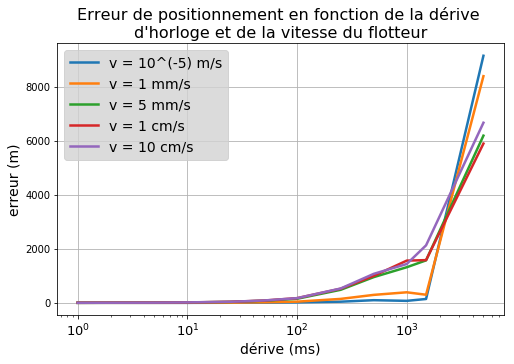

In [15]:
plt.figure(figsize=(8,5))
plt.plot(dr*1000., rms1[:,0] , label = 'v = 10^(-5) m/s',linewidth=2.5)
plt.plot(dr*1000., rms1[:,1], label = 'v = 1 mm/s', linewidth=2.5)
plt.plot(dr*1000., rms1[:,2], label = 'v = 5 mm/s',linewidth=2.5)
plt.plot(dr*1000., rms1[:,3], label = 'v = 1 cm/s',linewidth=2.5)
plt.plot(dr*1000., rms1[:,4], label = 'v = 10 cm/s',linewidth=2.5)
plt.title("Erreur de positionnement en fonction de la dérive \nd'horloge et de la vitesse du flotteur", 
          fontsize=16)
plt.xlabel("dérive (ms)", fontsize=14)
plt.ylabel("erreur (m)", fontsize=14)
plt.xscale('log')
plt.grid()
plt.xticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(fontsize=14, facecolor='lightgrey')


In [10]:
#rms_test1

(-500.0, 8000.0)

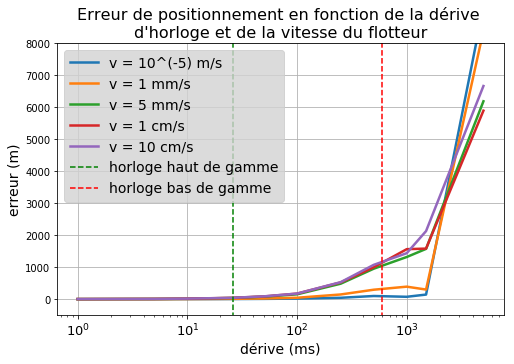

In [28]:
plt.figure(figsize=(8,5))
plt.plot(dr*1000., rms1[:,0] , label = 'v = 10^(-5) m/s',linewidth=2.5)
plt.plot(dr*1000., rms1[:,1], label = 'v = 1 mm/s', linewidth=2.5)
plt.plot(dr*1000., rms1[:,2], label = 'v = 5 mm/s',linewidth=2.5)
plt.plot(dr*1000., rms1[:,3], label = 'v = 1 cm/s',linewidth=2.5)
plt.plot(dr*1000., rms1[:,4], label = 'v = 10 cm/s',linewidth=2.5)


plt.plot([26.,26.],[-600.,10000.],'--', color='g', label='horloge haut de gamme')
plt.plot([600,600],[-600.,10000.],'--', color='r', label='horloge bas de gamme')

plt.title("Erreur de positionnement en fonction de la dérive \nd'horloge et de la vitesse du flotteur", 
          fontsize=16)
plt.xlabel("dérive (ms)", fontsize=14)
plt.ylabel("erreur (m)", fontsize=14)
plt.xscale('log')
plt.grid()
plt.xticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(fontsize=14, facecolor='lightgrey')

plt.ylim([-500.,8000.])


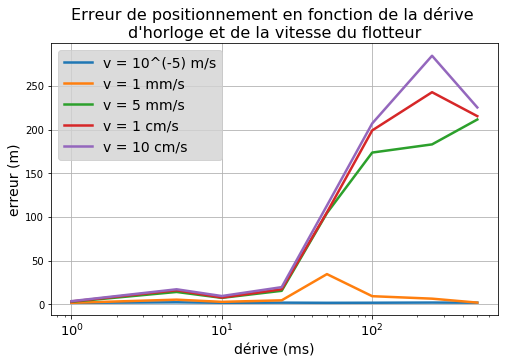

In [162]:
plt.figure(figsize=(8,5))
plt.plot(dr*1000., rms[:,0] , label = 'v = 10^(-5) m/s',linewidth=2.5)
plt.plot(dr*1000., rms[:,1], label = 'v = 1 mm/s', linewidth=2.5)
plt.plot(dr*1000., rms[:,2], label = 'v = 5 mm/s',linewidth=2.5)
plt.plot(dr*1000., rms[:,3], label = 'v = 1 cm/s',linewidth=2.5)
plt.plot(dr*1000., rms[:,4], label = 'v = 10 cm/s',linewidth=2.5)
plt.title("Erreur de positionnement en fonction de la dérive \nd'horloge et de la vitesse du flotteur", fontsize=16)
plt.xlabel("dérive (ms)", fontsize=14)
plt.ylabel("erreur (m)", fontsize=14)
plt.xscale('log')
plt.grid()
plt.xticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(fontsize=14, facecolor='lightgrey')

plt.savefig('erreur_derive_vitesse', dpi=100)

In [ ]:
### Avec 3 sources dérivantes. 


In [31]:
def simu1D (r, sources, Nmc, t_drift, pmap, x0=None) : 
    ''' It returns rms and bias on x position for one receiver position'''
    x=np.zeros(Nmc)
    y=np.zeros(Nmc)
    dt=np.zeros(Nmc)
    su = np.zeros (Nmc)
    
    for i in range(Nmc): 
        
        # solve a first time
        r.t_r_tilda = np.array([s.t_e+pmap.draw_t(dist(s,r))+r.dt for s in sources]).squeeze()
        x[i], dt[i], success, message, res = geolocalize_xtmap_1D(r, sources, pmap, clock_drift=t_drift)
        # rerun with adjusted expected errors on propagation time
        
        x[i], dt[i], success, message, res = geolocalize_xtmap_1D(r, sources, pmap, \
                                                                         clock_drift=t_drift, \
                                                                         x0=[x[i], dt[i]])
        if success :
            su[i] = 1 
        elif message.find('iterations')!= -1 : 
            # "Warning: Maximum number of iterations has been exceeded."
            su[i] = -1
        elif message.find('precision loss')!= -1 :
            #Warning: Desired error not necessarily achieved due to precision loss.
            su[i] = -2
        else : 
            su[i] = -3
    
    
    # rms error on the receiver position
    d_rms = np.sqrt( np.mean( (x[np.where(su==1)] - r.x)**2 ) )
    # biais on the receiver position
    bias_x = x[np.where(su==1)].mean()-r.x
    return (d_rms, bias_x, su)


Text(0.5,0,'x [km]')

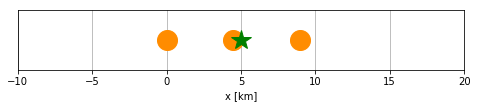

In [50]:
### create an ensemble of sources
sources3=[]
sources3.append(source( 0.e3, 0))
sources3.append(source( 4.5e3, 0))
sources3.append(source( 9.e3, 0))
Ns = len(sources3)

# init a receiver
r=receiver(5.e3, 0, e_x=10.e3, e_dt=0.0001)


plt.figure(figsize=(8,1.5))
ax=plt.subplot(111)
[s.plot() for s in sources3]
r.plot()
plt.ylim([-2, 2])
plt.xlim([-10.,20.])
ax.grid()
ax.set_aspect('equal')
ax.get_yaxis().set_visible(False)
plt.xlabel('x [km]')


In [44]:
#np.array([0.001, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1., 1.5, 5.])  
dr2 = np.array([0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1., 1.5, 5.])   # dérives d'horloges
rms_3s=np.zeros(len(dr2))

for i in range(len(dr2)) :
    r.dt = dr2[i]
    #r.draw_clock_drift(dr[i])
    rms_3s[i], _, _ = simu1D (r, sources3, Nmc, True, pmap, x0=None)
    #print(r.dt, rms)

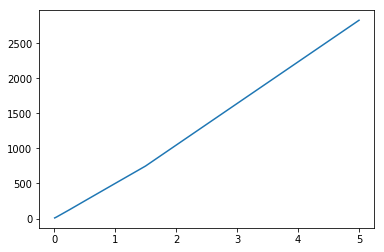

In [45]:
plt.plot(dr2, rms_3s)

In [ ]:
### 2 transects : 1 ok (v = 10-5m/s et dt = 5ms) et 1 nul (v=1cm/s et dt = 250ms) avec e_tp très faible (1ms)

In [49]:
sources2=[]
sources2.append(source( -20.e3, 0, v_x = 2.5))

In [50]:
t_e2 = np.array([0.,8000.,16000.])

In [98]:
L = 30.* 1.e3
X = np.linspace(-10.e3,20.e3,181)  # resolution : 500m
Y = 0. 

In [99]:
pmap = xtmap(c_b=1500., e_t=7.e-3) 
print("e_tp   = %.1f ms    (incertitude sur le temps d'arrivée)" %(pmap.e_tp(0.)*1000.))

e_tp   = 7.0 ms    (incertitude sur le temps d'arrivée)


In [102]:
Nmc = 100         # number of simulations
RMS1, BiasX1, _ = transect (sources, X, Y, Nmc, t_e, pmap, v_x=0.001, clock_drift = True, \
                                  e_dt=1., new_method=True) 

FloatProgress(value=0.0, description='Loading :')

No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more

No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more

In [138]:
Nmc = 10         # number of simulations
RMS2, BiasX2, _ = transect (sources, X, Y, Nmc, t_e, pmap, v_x=0.1, clock_drift = True, \
                                  e_dt=.5, new_method=True) 

FloatProgress(value=0.0, description='Loading :')

No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations


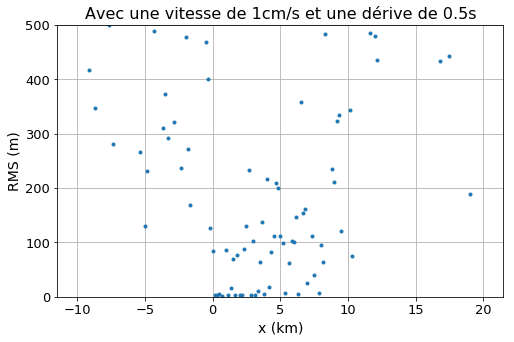

In [141]:
plt.figure(figsize=(8,5))
plt.subplot(111)
plt.plot(X/1.e3, RMS2, '.')
plt.xlabel('x (km)', fontsize=14)
plt.ylabel('RMS (m)', fontsize=14)
plt.title("Avec une vitesse de 1cm/s et une dérive de 0.5s" , fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.ylim([0,500.])

plt.show()

In [145]:
Nmc = 10         # number of simulations
RMS4, BiasX4, _ = transect (sources, X, Y, Nmc, t_e, pmap, v_x=0.001, clock_drift = True, \
                                  e_dt=1., new_method=True) 

FloatProgress(value=0.0, description='Loading :')

No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more

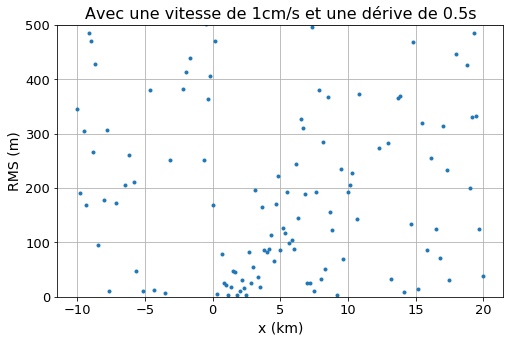

In [143]:
plt.figure(figsize=(8,5))
plt.subplot(111)
plt.plot(X/1.e3, RMS4, '.')
plt.xlabel('x (km)', fontsize=14)
plt.ylabel('RMS (m)', fontsize=14)
plt.title("Avec une vitesse de 1cm/s et une dérive de 0.5s" , fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.ylim([0,500.])

plt.show()

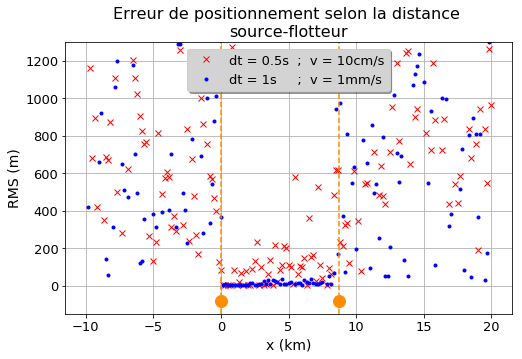

In [163]:
plt.figure(figsize=(8,5))
plt.subplot(111)

plt.plot(X/1.e3, RMS2, 'rx',  label = "dt = 0.5s  ;  v = 10cm/s")
plt.plot(X/1.e3, RMS1, 'b.', label = "dt = 1s     ;  v = 1mm/s")

plt.xlabel('x (km)', fontsize=14)
plt.ylabel('RMS (m)', fontsize=14)
plt.title("Erreur de positionnement selon la distance \nsource-flotteur" , fontsize=16)

x0 = sources[0].get_xy(t_e[0])[0]
xf = sources[0].get_xy(t_e[-1])[0]
plt.plot(x0/1.e3, -80., color='darkorange', marker='o', markersize=12)
plt.plot(xf/1.e3, -80., color='darkorange', marker='o', markersize=12)
plt.plot([x0/1.e3,x0/1.e3],[-150,1500],'--', color='darkorange')
plt.plot([xf/1.e3,xf/1.e3],[-150,1500],'--', color='darkorange')



plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.ylim([-150.,1300.])

plt.legend(fontsize=13, facecolor='lightgrey', framealpha=1., shadow=True)

plt.savefig('transect_source_mobile', dpi=100)

In [110]:
RMS_ok = RMS1

In [120]:
RMS_pasok = RMS2